In [30]:
# !pip install datadotworld
# !pip install datadotworld[pandas]

In [29]:
# !dw configure

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np

import datadotworld as dw

In [28]:
# drive.mount("/content/drive")

In [4]:
cd "drive/My Drive/Colab Notebooks"

/content/drive/My Drive/Colab Notebooks


In [ ]:
ls

ColabDriveGithub.ipynb  dataworkshop_matrix/  dw_matrix/


In [5]:
cd dataworkshop_matrix/


/content/drive/My Drive/Colab Notebooks/dataworkshop_matrix


In [6]:
ls

data/  Hello.ipynb  LICENSE  matrix_one/  README.md


In [ ]:
!mkdir data

In [7]:
!echo 'data' > .gitignore

In [8]:
!git add .gitignore

In [9]:
data = dw.load_dataset('datafiniti/mens-shoe-prices')

In [10]:
df = data.dataframes['7004_1']

/usr/local/lib/python3.6/dist-packages/datadotworld/models/dataset.py:209: UserWarning: Unable to set data frame dtypes automatically using 7004_1 schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 10
  'Error: {}'.format(resource_name, e))
/usr/local/lib/python3.6/dist-packages/datadotworld/util.py:121: DtypeWarning: Columns (39,45) have mixed types. Specify dtype option on import or set low_memory=False.
  return self._loader_func()


In [11]:
df.shape

(19387, 48)

In [12]:
df.sample(5)

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
3395,AVpfPVc61cnluZ0-g31m,NaN,Levi's,"Clothing, Shoes & Jewelry,Clothing,Men's Cloth...","Strong Black Rinse,Sea Drift,Rock Cod",NaN,2016-03-30T00:04:18Z,2016-04-06T00:10:09Z,NaN,NaN,NaN,"[{""key"":""Style"",""value"":[""Regular fit""]},{""key...",NaN,NaN,NaN,levismens505strengthstretchjeans/041va84419012...,NaN,00505-1327,NaN,Levi's Men's 505 Strength and Stretch Jeans,68.00,68.00,NaN,NaN,NaN,NaN,USD,2016-03-30T00:04:18Z,2016-03-31T00:00:00Z,NaN,false,Sears.com,NaN,NaN,NaN,NaN,NaN,http://www.sears.com/content/pdp/products/pric...,NaN,NaN,"[{""date"":""2016-01-20T00:00:00Z"",""dateAdded"":""2...","29,31,32","[{""sourceURLs"":[""http://www.sears.com/content/...",http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,NaN
6859,AVpe4kDsLJeJML43xcmR,NaN,Tony Lama,"All Men's Shoes,Shoes,Men's Shoes,Clothing",Brown,NaN,2017-01-12T06:20:32Z,2017-01-12T06:20:32Z,"[{""dateSeen"":[""2017-01-12T06:20:32Z""],""sourceU...",NaN,7.455154e+11,"[{""key"":""Heel Height"",""value"":[""Med (1 3/4 in....",NaN,https://i5.walmartimages.com/asr/e48ebf67-c5fc...,NaN,"745515378472,tonylama/rr4001,0745515378472",Tony Lama,RR4001,"[{""dateSeen"":[""2017-01-12T06:20:32Z""],""name"":""...",Tony Lama Rr4001 Men 2e Pointed Toe Leather Br...,203.99,203.99,NaN,NaN,new,NaN,USD,2017-01-12T06:20:32Z,2016-10-31T00:00:00Z,NaN,true,ApparelSave - Walmart.com,REDUCED USD 76.01,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Tony-Lama-RR4001-Me...,NaN,NaN,NaN,7.5,NaN,https://www.walmart.com/ip/Tony-Lama-RR4001-Me...,745515378472,NaN,NaN,NaN
8146,AVpe7vlqLJeJML43yodu,NaN,Navali,"Clothing, Shoes & Accessories,Men's Accessorie...",Brown,NaN,2016-04-12T03:04:56Z,2016-04-12T03:04:56Z,NaN,NaN,7.016493e+11,"[{""key"":""Style"",""value"":[""Messenger/Shoulder B...",NaN,http://i.ebayimg.com/images/g/2TIAAOSwnH1WW5Da...,NaN,"navali/36696,701649336696,0701649336696,genuin...",NaN,36696,"[{""dateSeen"":[""2016-04-11T00:00:00Z""],""name"":""...","""Genuine Premium Leather Shoulder 13"" Laptop M...",158.90,158.90,NaN,NaN,New with tags,NaN,USD,2016-04-12T03:04:56Z,2016-04-11T00:00:00Z,NaN,false,NaN,NaN,NaN,FREE,NaN,NaN,http://www.ebay.com/itm/Genuine-Premium-Leathe...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.ebay.com/itm/Genui...",http://www.ebay.com/itm/Genuine-Premium-Leathe...,701649336696,NaN,NaN,NaN
18023,AVpfjGGXilAPnD_xdv4W,NaN,"""""Ganesha Handicraft """"","Clothing, Shoes & Accessories,Men's Accessorie...",Brown,NaN,2016-04-08T23:36:08Z,2016-04-08T23:36:08Z,NaN,NaN,7.163372e+11,"[{""key"":""Material"",""value"":[""Leather""]},{""key""...",NaN,http://i.ebayimg.com/images/g/DWcAAOSwGOxW~55c...,NaN,"716337224599,0716337224599,newmensduffelgenuin...",NaN,NaN,"[{""dateSeen"":[""2016-04-07T00:00:00Z""],""name"":""...",New Men's Duffel Genuine Leather Large Vintage...,47.00,47.00,NaN,NaN,New without tags,NaN,USD,2016-04-08T23:36:08Z,2016-04-07T00:00:00Z,NaN,false,NaN,NaN,NaN,USD 25.00,NaN,NaN,http://www.ebay.com/itm/New-Mens-duffel-genuin...,NaN,NaN,NaN,24,"[{""sourceURLs"":[""http://www.ebay.com/itm/New-M...",http://www.ebay.com/itm/New-Mens-duffel-genuin...,716337224599,NaN,NaN,NaN
1712,AVpfT57hilAPnD_xZXne,NaN,Scully,"All Men's Clothing,Men's Clothing,Men's Outerw...",NaN,NaN,2016-01-01T02:17:17Z,2016-03-30T20:40:22Z,NaN,1 in x 5 in x 14 in,NaN,NaN,NaN,http://c.shld.net/rpx/i/s/pi/mp/1363/prod_3193...,NaN,scully92446smensleatherwearjacket44lodensmall/...,NaN,924-46-S,NaN,Scully 924-46-s Mens Leather Wear Jacket44 Lod...,185.03,185.03,NaN,NaN,

In [13]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [14]:
df.prices_currency.unique()

array(['USD', 'AUD', 'CAD', 'EUR', nan, 'GBP', 'New with box',
       'UnbeatableSale.com, Inc. - Walmart.com',
       'PalmBeach Jewelry - Walmart.com', 'new', 'New without tags',
       'SHOEBACCA LTD. - Walmart.com', 'Shoes.com',
       'Wholesale Costume and Party Supplies - Walmart.com'], dtype=object)

In [16]:
df.prices_currency.value_counts(normalize=True)

USD                                                   0.959246
AUD                                                   0.017503
CAD                                                   0.015691
EUR                                                   0.005541
GBP                                                   0.001139
PalmBeach Jewelry - Walmart.com                       0.000155
New with box                                          0.000155
UnbeatableSale.com, Inc. - Walmart.com                0.000155
new                                                   0.000155
Wholesale Costume and Party Supplies - Walmart.com    0.000104
Shoes.com                                             0.000052
SHOEBACCA LTD. - Walmart.com                          0.000052
New without tags                                      0.000052
Name: prices_currency, dtype: float64

In [17]:
df_usd = df[df.prices_currency == 'USD'].copy()

In [18]:
df_usd.shape

(18524, 48)

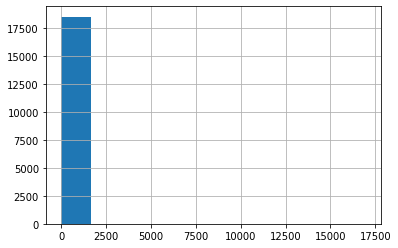

In [19]:
df_usd['prices_amountmin'] = df_usd.prices_amountmin.astype(np.float)
df_usd['prices_amountmin'].hist()

In [21]:
filter_max = np.percentile( df_usd['prices_amountmin'], 99)
filter_max

895.0

In [22]:
df_usd_filter = df_usd [ df_usd['prices_amountmin'] < filter_max ]

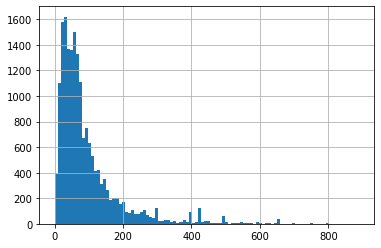

In [24]:
df_usd_filter.prices_amountmin.hist(bins = 100)

In [25]:
ls

data/  Hello.ipynb  LICENSE  matrix_one/  README.md


In [26]:
ls matrix_one

day3.ipynb


In [27]:
df.to_csv('data/shoes_prices.csv', index=False)

In [31]:
!git add matrix_one/day3.ipynb

In [34]:
!git commit -m "Read Men's Shoe Prices dataset from data.world"

[main e1d93b5] Read Men's Shoe Prices dataset from data.world
 2 files changed, 2 insertions(+), 129 deletions(-)
 rewrite .gitignore (100%)
 create mode 100644 matrix_one/day3.ipynb


In [33]:
!git config --global user.email "patryk.wojciechowski91@gmail.com"
!git config --global user.name "Patryk"

In [36]:
!git push

Counting objects: 5, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (5/5), 20.83 KiB | 1.74 MiB/s, done.
Total 5 (delta 0), reused 0 (delta 0)
To https://github.com/PatrykWojciechowski91/dataworkshop_matrix.git
   21b7a48..e1d93b5  main -> main
